<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving House_Sales_in_King_Count_USA-20231003-1696291200.jupyterlite.ipynb to House_Sales_in_King_Count_USA-20231003-1696291200.jupyterlite.ipynb


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
!pip install seaborn
import seaborn as sns

In [ ]:
!pip install requests

In [ ]:
import requests

def download(url, filename):
    """Downloads a file from a URL and saves it to a local file.

    Args:
        url (str): The URL of the file to download.
        filename (str): The local filename to save the downloaded file to.
    """
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
    with open(filename, "wb") as f:
        f.write(response.content)

In [ ]:
# Example usage
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv" # Removed extra single quotes
file_name ="housing.csv"
download(file_url, file_name) # Call download with both url and filename

In [ ]:
df = pd.read_csv(file_name)

In [ ]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_file.csv' with the actual filename if needed)
df=pd.read_csv(file_name)

# Display data types
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame loaded from 'housing.csv'

df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)  # Drop the columns
print(df.describe())  # Get statistical summary

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [ ]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


EDA


In [ ]:
floor_counts = df['floors'].value_counts().to_frame()
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


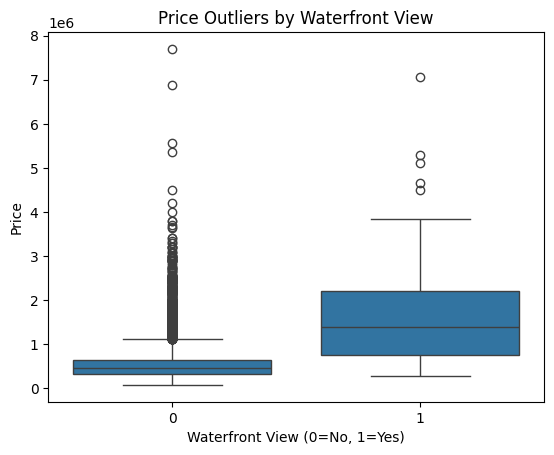

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Outliers by Waterfront View')
plt.xlabel('Waterfront View (0=No, 1=Yes)')
plt.ylabel('Price')
plt.show()

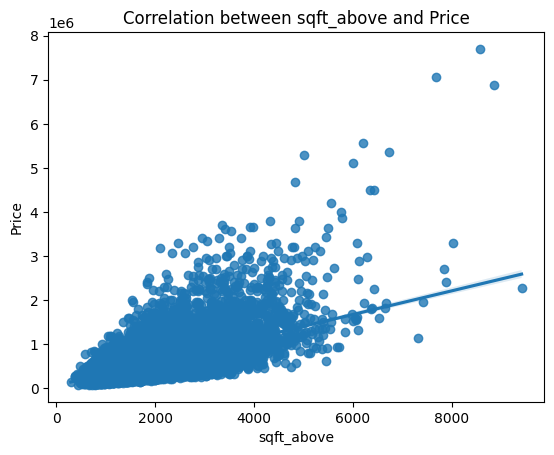

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Correlation between sqft_above and Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

The scatterplot with the regression line shows the relationship between the sqft_above feature and the house price. Here are the observations:

Positive Correlation:

The regression line indicates a positive correlation between sqft_above and Price, meaning that as the sqft_above increases, the price of the house generally tends to increase.
Data Spread:

The data points are widely spread around the regression line, particularly at higher values of sqft_above. This suggests that other factors may also influence the price.
Outliers:

A few points deviate significantly from the regression line, especially at higher sqft_above values. These are likely outliers or high-value properties with unique characteristics.
Conclusion:
The positive correlation is evident, but the spread and outliers suggest that additional features or transformations might be necessary for a more accurate prediction of house prices.

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract year from the date column
df['year'] = df['date'].dt.year

# Now calculate the correlation, excluding the original date column:
correlation = df.drop(columns=['date']).corr()

# Display the correlation with price, sorted
print(correlation['price'].sort_values())

zipcode         -0.053203
year             0.003576
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'df' is your DataFrame

# 1. Prepare the data
X = df[['sqft_living']]  # Features (sqft_living)
y = df['price']        # Target (price)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

R-squared: 0.49406905389089006
Intercept: -41999.18603993731
Coefficient: 279.55477931526383


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'df' is your DataFrame

# 1. Prepare the data
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  # Features
y = df['price']    # Target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients:")
for i, feature in enumerate(features):
    print(f"  {feature}: {model.coef_[i]}")

R-squared: 0.661402943173262
Intercept: -32302834.422547527
Coefficients:
  floors: -30690.424571173153
  waterfront: 584496.6623544655
  lat: 671322.6952979353
  bedrooms: -24057.22977330529
  sqft_basement: 63.51998016978905
  view: 68591.7031582818
  bathrooms: -39.45324245643087
  sqft_living15: 3.4555726978869643
  sqft_above: 65.01245648780605
  grade: 79887.03566928793
  sqft_living: 128.53243677096907


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'df' is your DataFrame

# 1. Prepare the data
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  # Features
y = df['price']    # Target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create the pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)

# 4. Fit the pipeline
pipe.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = pipe.predict(X_test)

# 6. Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.711164048190817


In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame

# 1. Prepare the data
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  # Features
y = df['price']    # Target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and fit the Ridge Regression model
# Create the pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',Ridge(alpha=0.1))]
pipe = Pipeline(Input)

# Fit the pipeline
pipe.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = pipe.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.7111636479597747


In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame

# 1. Prepare the data
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  # Features
y = df['price']    # Target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and fit the Ridge Regression model with 2nd order polynomial transform
# Create the pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model',Ridge(alpha=0.1))]
pipe = Pipeline(Input)

# Fit the pipeline
pipe.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = pipe.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.7111636479597747
